<a href="https://colab.research.google.com/github/dongzooo/Quant-with-py/blob/main/1_%ED%8F%AC%ED%8A%B8%ED%8F%B4%EB%A6%AC%EC%98%A4%20%EB%AA%A8%EB%8D%B8%EB%A7%81(yfinance)/2_%ED%9A%A8%EC%9C%A8%EC%A0%81_%EA%B2%BD%EA%B3%84%EC%84%A0_%EA%B5%AC%ED%98%84(SLSQP_Algo).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# yfinance 패키지 설치
!pip install yfinance --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 788.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 3.9 MB/s eta 0:00:00


In [ ]:
# 패키지 임포트: numpy, pandas, matplotlib, seaborn, yfinance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# seaborn 세팅하기
sns.set()

### 효율적 경계선 구현을 위한 최적화 알고리즘

In [ ]:
# 티커 리스트 정의
tickers = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']

# etf 객체 정의
etf = yf.Tickers(tickers)

# ETF 시계열 가격 데이터 다운로드
data = etf.history(start='2011-01-01', actions=False)

# 종가 이외의 데이터 제거
data.drop(['Open', 'High', 'Low', 'Volume'], inplace=True, axis=1)

# 열 이름 레벨 다운그레이드
data = data.droplevel(0, axis=1)

[*********************100%***********************]  9 of 9 completed


In [ ]:
data

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,
2011-01-03 00:00:00-05:00,30.168970,45.762104,10.574044,27.754169,21.301203,21.268742,20.726189,25.937010,32.382446
2011-01-04 00:00:00-05:00,29.966394,45.369431,10.561074,27.714645,21.384834,21.210770,20.824915,26.018602,32.202770
2011-01-05 00:00:00-05:00,30.036514,45.549129,10.684328,27.856899,21.510288,21.218012,20.693275,26.075714,32.468002
2011-01-06 00:00:00-05:00,29.880682,45.116531,10.612967,27.809483,21.635735,21.145552,20.713020,26.181784,32.271217
2011-01-07 00:00:00-05:00,29.849527,45.442638,10.522152,27.864805,21.535372,21.036846,20.785419,26.165461,32.254105
...,...,...,...,...,...,...,...,...,...
2023-01-30 00:00:00-05:00,82.830002,89.139999,36.070000,100.150002,134.089996,72.949997,68.580002,131.660004,145.369995
2023-01-31 00:00:00-05:00,84.650002,89.930000,36.560001,101.849998,135.960007,73.739998,69.089996,133.360001,148.699997
2023-02-01 00:00:00-05:00,85.209999,88.160004,36.560001,102.589996,139.160004,74.330002,69.209999,133.990005,151.520004


In [ ]:
# 알별 수익률 데이터
rets = data.pct_change().fillna(0)

# 기대수익률 계산
er = rets.mean() * 252

# 공분산행렬 계산
cov = rets.cov() * 252


In [ ]:
cov

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
XLB,0.045375,0.044877,0.040470,0.037947,0.034639,0.020333,0.020308,0.026015,0.033436
XLE,0.044877,0.082439,0.046734,0.041658,0.033858,0.019794,0.020683,0.026007,0.033376
XLF,0.040470,0.046734,0.051792,0.040175,0.035848,0.021632,0.021108,0.027870,0.035491
XLI,0.037947,0.041658,0.040175,0.039816,0.033769,0.020356,0.020377,0.025570,0.033014
XLK,0.034639,0.033858,0.035848,0.033769,0.046864,0.020672,0.019265,0.027512,0.037894
XLP,0.020333,0.019794,0.021632,0.020356,0.020672,0.020412,0.018509,0.017826,0.019237
XLU,0.020308,0.020683,0.021108,0.020377,0.019265,0.018509,0.032146,0.017471,0.017914
XLV,0.026015,0.026007,0.027870,0.025570,0.027512,0.017826,0.017471,0.028317,0.024687
XLY,0.033436,0.033376,0.035491,0.033014,0.037894,0.019237,0.017914,0.024687,0.040777


### 포트폴리오 시뮬레이션

In [ ]:
# 포트폴리오 수익률을 위한 빈 리스트 생성
p_returns = []

# 포트폴리오 변동성을 위한 빈 리스트 생성
p_volatility = []

In [ ]:
# 자산의 개수
noa = len(tickers)

# 시뮬레이션 횟수
n_ports = 10000

In [ ]:
# for문을 돌려 시뮬레이션 실행
for i in range(n_ports):

    # 난수를 생성하여 임의의 투자 가중치 배분
    weights = np.random.random(noa)
    weights /= np.sum(weights)

    # 포트폴리오 수익률과 변동성 계산
    ret = np.dot(weights, er)
    vol = np.sqrt(np.dot(weights.T, np.dot(cov, weights)))

    # 1회 시뮬레이션을 통해 얻어낸 포트폴리오 수익률과 변동성 데이터를 리스트에 저장
    p_returns.append(ret)
    p_volatility.append(vol)

In [ ]:
# 포트폴리오 수익률 및 변동성 데이터 배열로 변환
prets = np.array(p_returns)
pvols = np.array(p_volatility)

### 난수 생성을 통한 포트폴리오 시뮬레이션 시각화

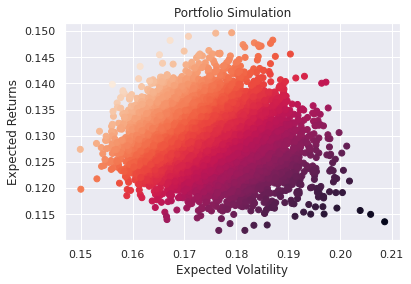

In [ ]:
# 산포도를 이용해 시뮬레이션 결과 시각화
# x축: 포트폴리오 변동성
# y축: 포트폴리오 수익률
# 색깔: 포트폴리오 샤프비율
plt.scatter(x=pvols, y=prets, c=prets/pvols, marker='o')

# x축 제목
plt.xlabel('Expected Volatility')

# y축 제목
plt.ylabel('Expected Returns')

# 그래프 타이틀
plt.title('Portfolio Simulation')

# 그래프 생성
plt.show()

### 최적화 모듈 `scipy.optimize`
파이썬의 `scipy` 패키지는 간단하게 최적화 계산을 수행할 수 있는 `optimize`라는 도구를 제공하고 있습니다. 이를 활용하면 우리는 최적화 계산을 수행하는 코드를 직접 만들 필요가 없습니다. 이 함수가 알아서 모든 계산 처리를 해주기 때문입니다. 우리는 최적화에 필요한 몇 가지 인자들을 함수에 넘겨주기만 하면 됩니다.


### [`scipy.optimize.minimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) 문법구조
```python
scipy.optimize.minimize(
    fun: 목적함수
    x0: 초기값
    args: 초기값 외에 목적함수에 전달할 인자
    method: 최적화를 수행할 알고리즘의 종류
    bounds: 상하한 경계값
    constraints: 제약조건
    )
```

`scipy.optimize.minimize()`의 문법구조의 위와 같습니다. 우선 첫번째 인자는 최소화를 시켜주어야 하는 목적함수(`fun`)가 들어갑니다. 두번째로는 초깃값(`x0`)입니다. 이 초기값은 가중치에 대한 초기값으로써 순수하게 임의의 값이 들어갈 수 있습니다. 다만 일반적으로는 전체 자산에 대해 동일한 가중치를 넣어주는 것이 관행입니다. 이 초기값에서 시작해서 최적화 알고리즘은 시행착오 방식을 통해 최적의 가중치를 찾아 여행을 떠납니다. 세번째 인자는 목적함수에 전달해주어야 하는 인자(`args`)입니다. 가령 샤프비율 최소화가 목적함수라고 한다면 가중치 이외에도 샤프비율을 계산하기 위해 각 자산들의 기대수익률과 공분산행렬이 필요합니다. 네번째는 최적화를 수행할 알고리즘의 종류(`method`)입니다. VOD에서 다룬 것처럼 우리는 앞으로 SLSQP 알고리즘을 사용할 것이기 때문에 여기에는 `SLSQP`라고 적어주면 됩니다. 다섯번째는 상하한 경계값입니다. 여기서 말하는 상하한 경계값(`bnds`)은 각 가중치가 가질 수 있는 상하한값을 의미합니다. 롱온리 포트폴리오는 자산의 공매도를 가정하지 않기 때문에 이러한 조건을 여기에 적어주어야 합니다. 마지막으로는 제약조건(`constraints`)입니다. 여기서 말하는 제약조건은 전체 자산 가중치들의 합이 1이 되어야 한다거나 포트폴리오의 수익률이 특정 기대수익률 수준이 되어야 한다거나 하는 조건들을 말합니다. 파이썬 최적화 알고리즘은 목적함수와 제약조건을 명시적으로 알려주기만 하면 알아서 상황에 맞는 최적화 결과물을 산출해줍니다. 앞으로 다룰 여러 가지 횡적 배분 모델을 구현하는데 있어서 이러한 최적화 알고리즘은 필수적인 요소입니다.

### 효율적 경계선 구현

In [ ]:
# scipy 패키지 임포트
import scipy.optimize as sco

In [ ]:
# 포트폴리오 통계치 계산 함수
def statistics(weights):

    # 투자 가중치
    weights = np.array(weights)

    # 포트폴리오 수익률
    pret = np.sum(er * weights)

    # 포트폴리오 변동성
    pvol = np.sqrt(np.dot(weights.T, np.dot(cov, weights)))

    # 포트폴리오 수익률과 변동성, 샤프비율을 반환W
    return np.array([pret, pvol, pret/pvol])

In [ ]:
# 난수를 활용해 임의의 가중치 데이터 생성
weights = np.random.random(noa)
weights /= np.sum(weights)

In [ ]:
np.sum(weights)

1.0

In [ ]:
# 목적함수 정의
# 여기서 목적함수는 포트폴리오 변동성
def obj_func(weights):
    return statistics(weights)[1]

In [ ]:
# 수익률 수준별 포트폴리오 최적화 수행
trets = np.linspace(0.09, 0.16, 50)
tvols = []

# for문을 돌려 각 목표수익률에 맞는 포트폴리오 변동성 레벨을 계산
for tret in trets:

    # 투자 가중치 초기값 = 동일가중
    init_guess = np.repeat(1/noa, noa)

    # 제약조건 (포트폴리오 목표 수익률, 현금 보유 비중 0)
    cons = ({'type': 'eq', 'fun': lambda x: statistics(x)[0] - tret},
            {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

    # 자산별 경계조건 (숏 포지션 불가능)
    bnds = tuple((0.0, 1.0) for x in weights)

    # 최적화 알고리즘 수행
    res = sco.minimize(obj_func,
                       init_guess,
                       method='SLSQP',
                       bounds=bnds,
                       constraints=cons)
    

    # 최적화 알고리즘을 통해 찾아낸 최적 포트폴리오의 변동성 값을 리스트에 저장
    tvols.append(res['fun'])

# 포트폴리오 변동성 리스트를 배열로 변환
tvols = np.array(tvols)

In [ ]:
# 좌측 경계선 데이터 수집
ind = np.argmin(tvols)
evols = tvols[ind:]
erets = trets[ind:]

Text(0.5, 1.0, 'Efficient Frontier')

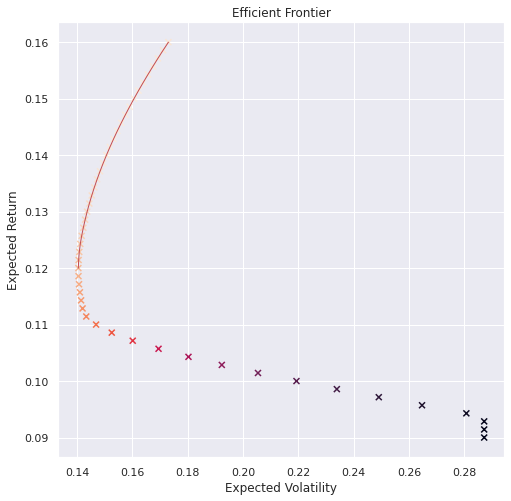

In [ ]:
# 효율적 경계선 시각화
plt.figure(figsize=(8, 8))
plt.scatter(tvols, trets, c=trets/tvols, marker='x')
plt.plot(evols, erets, 'r', lw=1.0)
plt.grid(True)

plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')